In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
fname = '/mnt/lustre/datadive/Ecology/environmentaldata.csv'

In [52]:
data = pd.read_csv(fname, low_memory=False, parse_dates=[4], infer_datetime_format=True)

In [53]:
data.head()

,id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,yr,month,day
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,BOD ATU,BOD : 5 Day ATU,85,<,3.00,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.50,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,Chloride Ion,Chloride,172,NaN,14.10,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,pH,pH,61,NaN,7.15,NaN,phunits,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22 10:30:00,COD as O2,Chemical Oxygen Demand :- {COD},92,NaN,27.00,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350.0,146570,2000,3,22


In [12]:
data.iloc[0]['sample.samplingPoint']

'http://environment.data.gov.uk/water-quality/id/sampling-point/SO-19801A08'

`determinand.notation` is a numerical code for the determinand (type of measurement)

`result` is the actual measurement. `resultQualifier.notation` shows if it's a limit or an actual measurement.

In [13]:
locations = set(data['sample.samplingPoint.label'])

In [21]:
langstone = [x for x in locations if 'langstone' in x.lower()]

In [22]:
df = data.loc[data['sample.samplingPoint.label'].isin(langstone)]

In [23]:
len(df)

30646

In [25]:
df.head()

,id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,yr,month,day
134517,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003467,LANGSTONE BRIDGE,2000-02-02 10:11:00,SALinsitu,Salinity : In Situ,7608,NaN,30.800,NaN,ppt,ESTUARINE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,471800.0,104300,2000,2,2
134518,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003467,LANGSTONE BRIDGE,2000-02-02 10:11:00,COPA,COPA,1002,NaN,10.000,NaN,unitless,ESTUARINE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,471800.0,104300,2000,2,2
134519,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003467,LANGSTONE BRIDGE,2000-02-02 10:11:00,Orthophospht,"Orthophosphate, reactive as P",180,NaN,0.136,NaN,mg/l,ESTUARINE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,471800.0,104300,2000,2,2
134520,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003467,LANGSTONE BRIDGE,2000-02-02 10:11:00,O Diss %sat,"Oxygen, Dissolved, % Saturation",9901,NaN,90.200,NaN,%,ESTUARINE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,471800.0,104300,2000,2,2
134521,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-G0003467,LANGSTONE BRIDGE,2000-02-02 10:11:00,Nitrite-N,Nitrite as N,118,NaN,0.021,NaN,mg/l,ESTUARINE WATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,471800.0,104300,2000,2,2


In [26]:
langstone

['LANGSTONE CHAN SOUTHMOOR POINT',
 'NW SINAH BUOY, LANGSTONE',
 'DUMP-INV LANGSTONE WEED-CLOSED',
 'LANGSTONE HARBOUR WFD BI',
 'LANGSTONE HARBOUR MOUTH',
 'BROOM CHANNEL LANGSTONE HARBR',
 'LANGSTONE HARBOUR-SFW',
 'LANGSTONE CHANNEL THE DEEPS',
 'LANGSTONE HARBOUR CSEMP MUSSELS',
 'LANGSTONE BRIDGE',
 'A2030 BRIDGE, LANGSTONE',
 'THE RAFTS LANGSTONE',
 'ALPHA BUOY LANGSTONE',
 'DUMP-INV LANGSTONE SED-*CLOSED']

In [27]:
df_bridge = data.loc[data['sample.samplingPoint.label'].isin(['LANGSTONE BRIDGE'])]

In [28]:
len(df_bridge)

2821

In [31]:
set(df_bridge['sample.sampleDateTime'])

{'2000-02-02 10:11:00',
 '2000-02-28 17:39:00',
 '2000-03-28 17:47:00',
 '2000-04-26 17:42:00',
 '2000-05-26 08:52:00',
 '2000-06-26 06:09:00',
 '2000-07-11 08:08:00',
 '2000-08-09 07:27:00',
 '2000-09-06 17:34:00',
 '2000-10-05 17:28:00',
 '2000-11-20 06:48:00',
 '2001-01-18 06:35:00',
 '2001-02-20 11:18:00',
 '2001-03-20 09:52:00',
 '2001-04-18 08:59:00',
 '2001-05-18 09:57:00',
 '2001-06-14 18:11:00',
 '2001-07-16 20:05:00',
 '2001-08-28 06:57:00',
 '2001-09-26 07:07:00',
 '2001-11-22 15:49:00',
 '2002-01-25 08:38:00',
 '2002-02-07 07:52:00',
 '2002-03-08 07:04:00',
 '2002-04-08 09:52:00',
 '2002-05-07 09:19:00',
 '2002-06-06 09:10:00',
 '2002-07-02 19:12:00',
 '2002-08-05 09:34:00',
 '2002-09-17 10:06:00',
 '2002-10-02 08:53:00',
 '2002-11-15 08:39:00',
 '2002-12-10 16:33:00',
 '2003-01-13 08:32:00',
 '2003-02-13 09:01:00',
 '2003-03-11 16:27:00',
 '2003-04-25 08:49:00',
 '2003-05-27 10:13:00',
 '2003-06-25 09:39:00',
 '2003-07-24 09:35:00',
 '2003-08-08 08:53:00',
 '2003-09-22 10:

In [35]:
set(df_bridge['determinand.definition'])

{'Ammonia un-ionised as N',
 'Ammoniacal Nitrogen as N',
 'Ammoniacal Nitrogen, Filtered as N',
 'COPA',
 'Chlorophyll : Acetone Extract',
 'Chlorophyll a + b',
 'Chlorophyll a : HPLC',
 'Chlorophyll b',
 'Conductivity at 20 C',
 'Conductivity at 25 C',
 'Data Handling',
 'NGR : Easting',
 'NGR : Northing',
 'Nitrate as N',
 'Nitrate, Filtered as N',
 'Nitrite as N',
 'Nitrite, Filtered as N',
 'Nitrogen, Dissolved Inorganic : as N',
 'Nitrogen, Total Oxidised as N',
 'Nitrogen, Total Oxidised, Filtered as N',
 'Orthophosphate, Filtered as P',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Phaeophytin A',
 'Phaeophytin B',
 'Salinity : In Situ',
 'Sample Depth below surface',
 'Silicate, Filtered as SiO2',
 'Temperature of Water',
 'Time of high tide',
 'Time of sampling relative to previous high water',
 'Transparency',
 'Turbidity : In Situ',
 'Volume of Sample Filtered',
 'Water Depth',
 'pH'}

In [60]:
times = df_bridge[df_bridge['determinand.definition'] == 'Temperature of Water']['sample.sampleDateTime']

In [61]:
tide = np.array(df_bridge[df_bridge['determinand.definition'] == 'Temperature of Water']['result'])

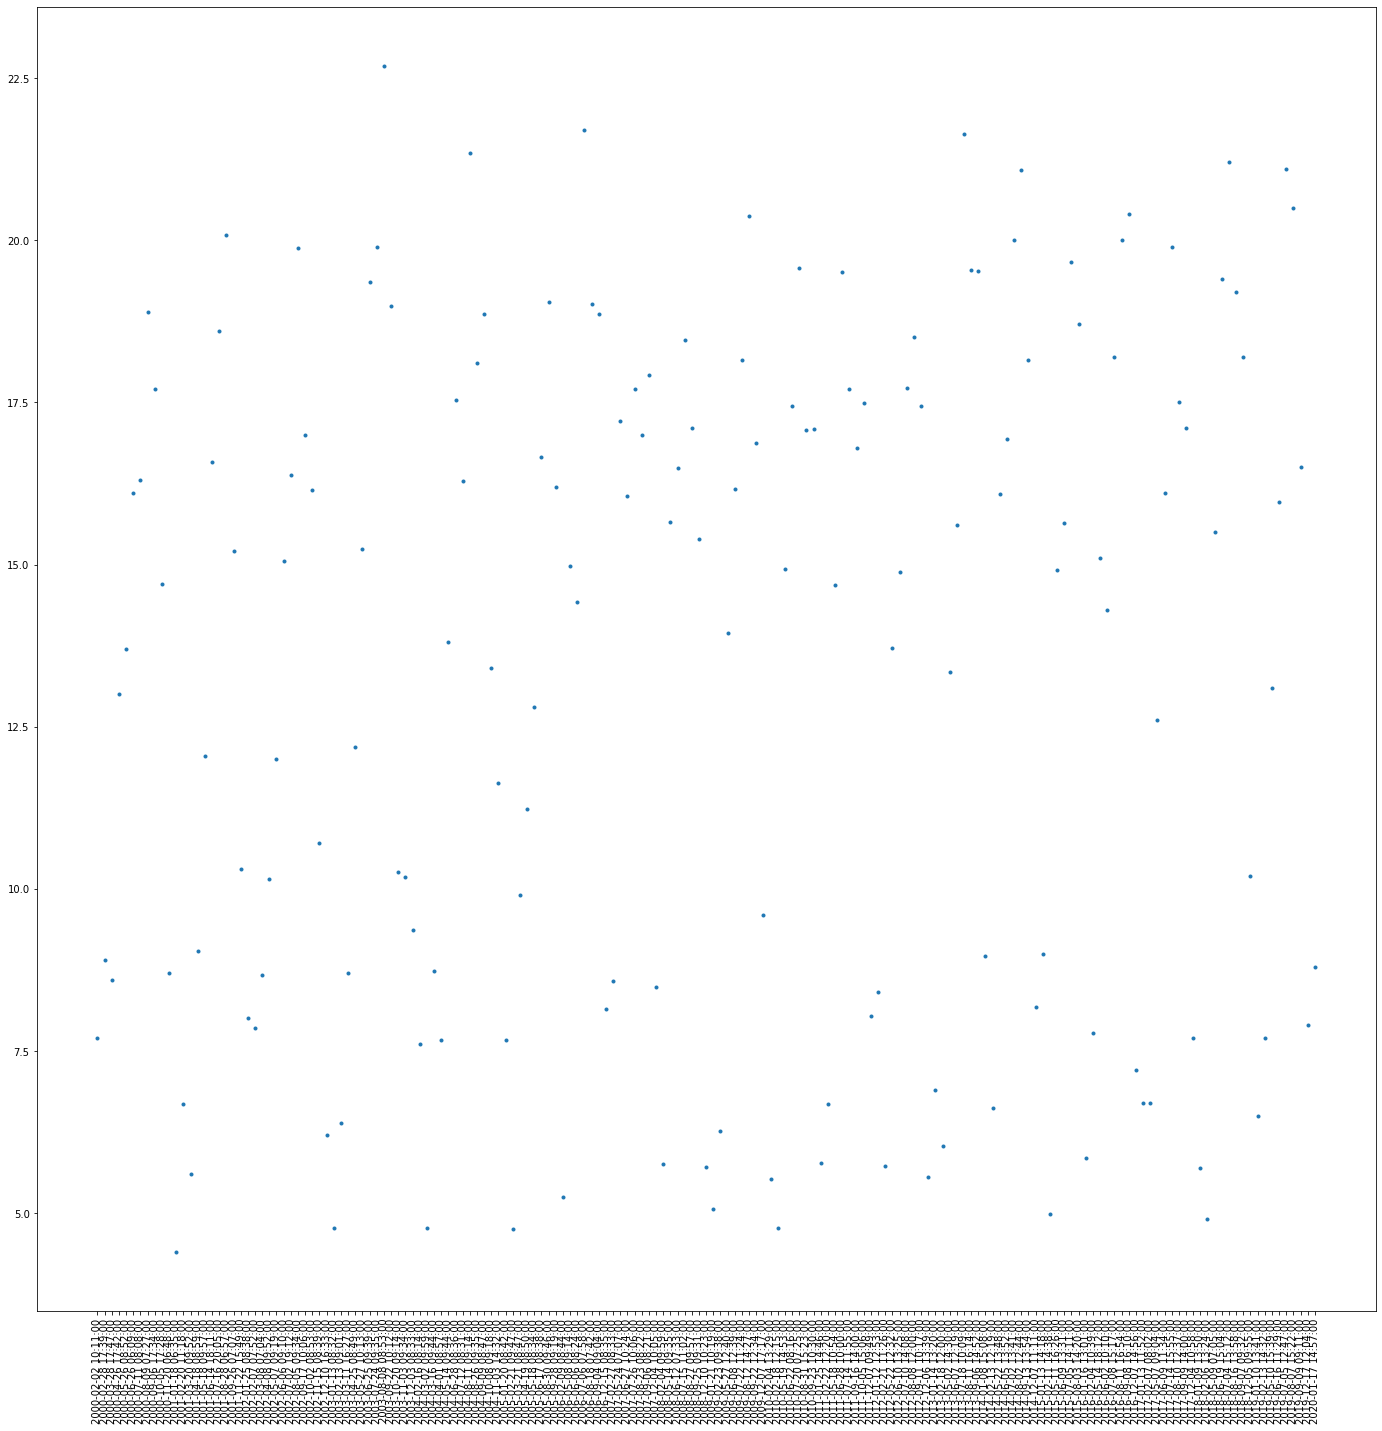

In [67]:
plt.figure(figsize=(24,24))
plt.plot(times, tide, '.')
plt.xticks(rotation=90);

In [66]:
times[-10:]

3510397    2018-12-05 09:55:00
3613179    2019-01-10 13:41:00
3613207    2019-02-13 14:32:00
3613233    2019-05-10 15:39:00
3613237    2019-06-16 11:29:00
3613271    2019-07-05 12:47:00
3613290    2019-08-07 15:22:00
3613303    2019-09-09 09:11:00
3613332    2019-12-17 12:04:00
3678855    2020-01-17 14:57:00
Name: sample.sampleDateTime, dtype: object